\begin{center} 
Chun-Yuan (Scott) Chiu 
\end{center}

\begin{center} 
chunyuac@andrew.cmu.edu 
\end{center} 

# 1. {-}

## (a) {-}

Let $\beta = (\beta_0, \beta_1, \beta_2, \ldots, \beta_K)^T$ be the coefficient vector in $\mathbb R^{K+1}$ and $b_0(x) = 1$ be a constant function. Thus we can write $f$ as 
\begin{align*}
f(x) = \sum_{k=0}^K \beta_kb_k(x). 
\end{align*}
Let $B$ be the $n\times(K+1)$ matrix
\begin{align*}
B = \begin{pmatrix}
b_0(x_1) & b_1(x_1) & b_2(x_1) & \cdots & b_K(x_1)\\
b_0(x_2) & b_1(x_2) & b_2(x_2) & \cdots & b_K(x_2)\\
b_0(x_3) & b_1(x_3) & b_2(x_3) & \cdots & b_K(x_3)\\
\vdots & \vdots & \vdots & \ddots & \vdots \\
b_0(x_n) & b_1(x_n) & b_2(x_n) & \cdots & b_K(x_n)
\end{pmatrix}
\end{align*}
and $y = (y_1, y_2, \ldots, y_n)^T$ be the response vector in $\mathbb R^{n}$. 
Then 
\begin{align*}
\lVert B\beta - y \rVert^2_2 = \sum_{i=1}^n \left(\sum_{k=0}^K \beta_kb_k(x_i) - y_i\right)^2 = \sum_{i=1}^n \left(f(x_i) - y_i\right)^2.
\end{align*}
So $\lVert B\beta - y \rVert^2_2$ is the desired matrix/vector form of the first term of the objective function. In pure matrix form, this is written as 
\begin{align*}
\lVert B\beta - y \rVert^2_2 &= (B\beta - y)^T(B\beta - y) \\
&= \beta^TB^TB\beta - 2y^TB\beta + y^Ty.
\end{align*}



## (b) {-}

Let $A$ be the $(K+1)\times(K+1)$ (symmetric) matrix
\begin{align*}
A = \begin{pmatrix}
\int b_0^{\prime\prime}(x)b_0^{\prime\prime}(x) dx & \int b_0^{\prime\prime}(x)b_1^{\prime\prime}(x) dx & \int b_0^{\prime\prime}(x)b_2^{\prime\prime}(x) dx & \cdots & \int b_0^{\prime\prime}(x)b_K^{\prime\prime}(x) dx\\
\int b_1^{\prime\prime}(x)b_0^{\prime\prime}(x) dx & \int b_1^{\prime\prime}(x)b_1^{\prime\prime}(x) dx & \int b_1^{\prime\prime}(x)b_2^{\prime\prime}(x) dx & \cdots & \int b_1^{\prime\prime}(x)b_K^{\prime\prime}(x) dx\\
\int b_2^{\prime\prime}(x)b_0^{\prime\prime}(x) dx & \int b_2^{\prime\prime}(x)b_1^{\prime\prime}(x) dx & \int b_2^{\prime\prime}(x)b_2^{\prime\prime}(x) dx & \cdots & \int b_2^{\prime\prime}(x)b_K^{\prime\prime}(x) dx\\
\vdots & \vdots & \vdots & \ddots & \vdots \\
\int b_K^{\prime\prime}(x)b_0^{\prime\prime}(x) dx & \int b_K^{\prime\prime}(x)b_1^{\prime\prime}(x) dx & \int b_K^{\prime\prime}(x)b_2^{\prime\prime}(x) dx & \cdots & \int b_K^{\prime\prime}(x)b_K^{\prime\prime}(x) dx
\end{pmatrix}.
\end{align*}
Then we can write 
\begin{align*}
\int (f^{\prime\prime}(x))^2dx  &= \int \left(\sum_{k=0}^K \beta_kb_k^{\prime\prime}(x) \right)^2dx \\
&= \int \left(\sum_{i=0}^K\sum_{j=0}^K \beta_i\beta_jb_i^{\prime\prime}(x)b_j^{\prime\prime}(x)\right) dx \\
&= \sum_{i=0}^K\sum_{j=0}^K \beta_i\beta_j\int b_i^{\prime\prime}(x)b_j^{\prime\prime}(x) dx \\
&= \beta^TA\beta.
\end{align*}


## (c) {-}

Combining part (a) and (b), the objective function is 
\begin{align*}
\beta^TB^TB\beta - 2y^TB\beta + y^Ty + \lambda\beta^TA\beta &= \beta^T(B^TB + \lambda A)\beta - 2y^TB\beta + y^Ty. 
\end{align*}
At its minimum the gradient must be zero, so
\begin{align*}
-2B^Ty + ((B^TB + \lambda A) + (B^TB + \lambda A)^T)\beta = 2(-B^Ty + (B^TB + \lambda A)\beta) = 0, 
\end{align*}
which solves to $\beta = (B^TB + \lambda A)^{-1}B^Ty$.



# 2. {-}

## (a), (b) {-}

100% (30 of 30) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


Optimal lambda:  0.4893900918477489


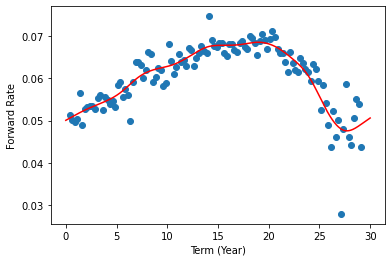

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pygam import LinearGAM

rates = pd.read_csv('forward_rates.csv')
x = rates['time'].values
y = rates['rate'].values

x_grid = np.linspace(0, 30, num=1000)
gam = LinearGAM().gridsearch(x.reshape((-1, 1)), y, lam=np.logspace(-5, 3, 30), keep_best=True)
print('Optimal lambda: ', gam.lam[0][0])

plt.scatter(x, y)
plt.plot(x_grid, gam.predict(x_grid), c='r')
plt.xlabel('Term (Year)')
plt.ylabel('Forward Rate')
plt.show()


## (c) {-}

A cubic spline is a piecewise cubic polynomial so its definite integral is known in closed form. Although it takes time to location which "piece" the limits of integration are in ($O(n)$ or $O(\log n)$, depending on whether the knots are sorted, where $n$ is the number of knots), it is computationally very cheap compared to numerical integration like Simpson's rule. 

# 3. {-}

## (a) {-}

First we confirm there is no missing data in the data sets.

In [1]:
import pandas as pd

train = pd.read_csv('bike_train.csv')
test = pd.read_csv('bike_test.csv')

train.isna().any().any(), test.isna().any().any()

(False, False)

An OLS is fitted and used to predict the rentals. The prediction is then multiplied by 1.6 to account for the ridership growth. Below is the MSE on the test data. 

In [2]:
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

X_train = pd.read_csv('bike_train.csv')
y_train = X_train.pop('rentals')

ols = sm.OLS(exog=sm.add_constant(X_train), endog=y_train).fit()

X_test = pd.read_csv('bike_test.csv')
y_test = X_test.pop('rentals')

mean_squared_error(ols.predict(exog=sm.add_constant(X_test))*1.6, y_test)

1295159.3945082375

## (b) {-}

In [3]:
X_train.head()

,dayofyear,dayofweek,workday,weathertype,temp,humidity,windspeed
0,0,6,0,2,0.344167,0.805833,0.160446
1,1,0,0,2,0.363478,0.696087,0.248539
2,2,1,1,1,0.196364,0.437273,0.248309
3,3,2,1,1,0.200000,0.590435,0.160296
4,4,3,1,1,0.226957,0.436957,0.186900


In [5]:
from pygam import LinearGAM, s, f
import numpy as np

gam = LinearGAM(s(0)+f(1)+f(2)+f(3)+s(4)+s(5)+s(6), fit_intercept=True).gridsearch(X_train.values, y_train.values, lam=[np.logspace(-1, 2, 3)]*7)

100% (2187 of 2187) |####################| Elapsed Time: 0:22:30 Time:  0:22:30


In [10]:
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     37.6924
Link Function:                     IdentityLink Log Likelihood:                                 -4811.8819
Number of Samples:                          365 AIC:                                             9701.1487
                                                AICc:                                            9710.5908
                                                GCV:                                           259785.4598
                                                Scale:                                         211990.7438
                                                Pseudo R-Squared:                                   0.8997
Feature Function                  Lam

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  """Entry point for launching an IPython kernel.


In [4]:
from pygam import LinearGAM, s, f

gam = LinearGAM(s(0)+f(1)+f(2)+f(3)+s(4)+s(5)+s(6), fit_intercept=True, lam=[0.1, 100, 100, 0.1, 3.1623, 3.1623, 100]).fit(X_train.values, y_train.values)
mean_squared_error(gam.predict(X_test)*1.6, y_test)

974017.8932338969

In [6]:
X_train.shape

(365, 7)

In [7]:
x_grid.shape

NameError: name 'x_grid' is not defined

In [12]:
from pandas import DataFrame

df = DataFrame(x_grid)
df

,0,1,2,3,4,5,6
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,3.676768,0.0,0.0,0.0,0.0,0.0,0.0
2,7.353535,0.0,0.0,0.0,0.0,0.0,0.0
3,11.030303,0.0,0.0,0.0,0.0,0.0,0.0
4,14.707071,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
95,349.292929,0.0,0.0,0.0,0.0,0.0,0.0
96,352.969697,0.0,0.0,0.0,0.0,0.0,0.0
97,356.646465,0.0,0.0,0.0,0.0,0.0,0.0
98,360.323232,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:xlabel='0'>

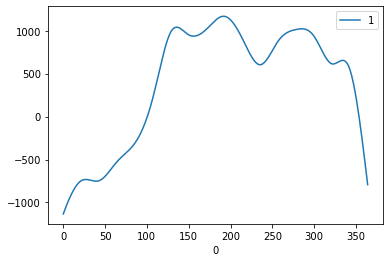

In [29]:
x_grid = gam.generate_X_grid(0)
# pdep, confi = gam.partial_dependence(term=0, X=x_grid, width=.95)
pdep, confi = gam.partial_dependence(term=0, X=X_train, width=.95)
DataFrame([X_train['dayofyear'].values, pdep]).T.set_index(0).plot()

ValueError: X data is out of domain for categorical feature 3. Expected data on [1.0, 3.0], but found data on [0.0, 0.0]

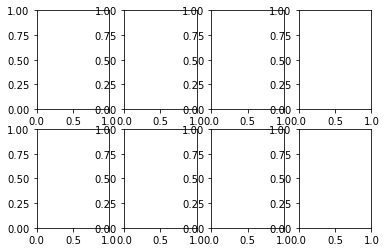

In [5]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 4)

for i, ax in enumerate(axs.flatten()):
    x_grid = gam.generate_X_grid(i)
    pdep, confi = gam.partial_dependence(term=i, X=x_grid, width=.95)

    ax.plot(x_grid[:, i], pdep)
    #ax.plot(XX[:, i], confi[0], c='r', ls='--')
#     ax.set_title(titles[i])

plt.show()